In [2]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Found 1881 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
Found 509 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 

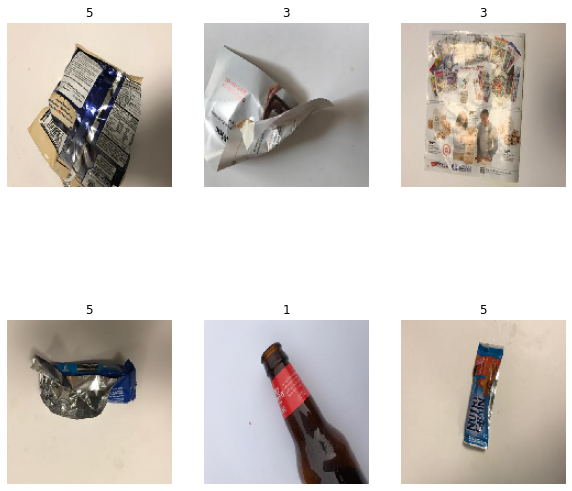

In [9]:
train_path='./drive/MyDrive/DerinOgrenme/Dataset/train/'
test_path='./drive/MyDrive/DerinOgrenme/Dataset/test/'

train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1 
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    shuffle=True,
    class_mode='categorical',
    batch_size=8,
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical',
    batch_size=8,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    shuffle=True,
    class_mode='categorical', #okuyacağınız verinin türü
    batch_size=1
)

print(test_generator.class_indices)
print(test_generator.classes)

plt.figure(figsize=(10,10))

for i in range(6):
  img,y=test_generator.next()
  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.title(list(y[:5][0]).index(1))
  plt.imshow(img[0])

In [19]:
model=Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(6,activation='softmax'))


model.compile(loss="categorical_crossentropy",optimizer="SGD",metrics=['accuracy'])

model.summary()

history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//8,
    validation_data=val_generator,
    epochs=130,
    validation_steps=val_generator.samples//8 
    )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_54 (Dense)             (None, 128)              

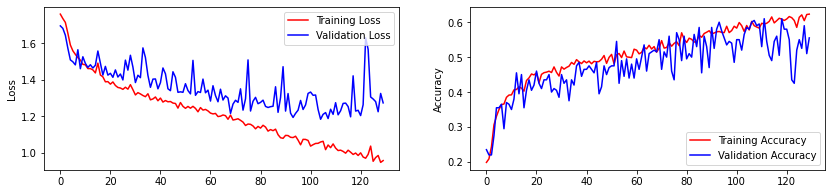

In [20]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=10)
plt.plot(history.history['loss'], color ='r', label='Training Loss')
plt.plot(history.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=10)
plt.plot(history.history['accuracy'], color ='r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color ='b', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [21]:
y_test = model.predict_generator(test_generator)
y_pred = np.argmax(y_test, axis=-1)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred))
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

           0       0.26      0.28      0.27        81
           1       0.27      0.25      0.26       101
           2       0.17      0.18      0.17        82
           3       0.24      0.29      0.26       119
           4       0.19      0.15      0.17        98
           5       0.05      0.04      0.04        28

    accuracy                           0.22       509
   macro avg       0.20      0.20      0.20       509
weighted avg       0.22      0.22      0.22       509

Confusion Matrix
[[23 13 13 19  9  4]
 [11 25 18 26 19  2]
 [17 13 15 25 10  2]
 [17 19 21 34 26  2]
 [17 13 16 29 15  8]
 [ 5  9  7  6  0  1]]
